In [16]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [17]:
# Function to load a single CSV and extract aggregated features
def extract_features(file_path):
    df = pd.read_csv(file_path)
    
    # Assuming each file has a standard MFCC format (e.g., one coefficient per column)
    feature_means = df.mean(axis=0)
    feature_std = df.std(axis=0)
    feature_min = df.min(axis=0)
    feature_max = df.max(axis=0)
    
    # Concatenate these features into one feature vector for this file
    feature_vector = np.concatenate([feature_means, feature_std, feature_min, feature_max])
    
    return feature_vector

# Load all MFCC files and extract features
def load_all_features(directory):
    features_list = []
    file_names = []
    
    for i in range(1, 117):
        file_name = f"{i:02d}-MFCC.csv"
        file_path = os.path.join(directory, file_name)
        
        features = extract_features(file_path)
        features_list.append(features)
        file_names.append(file_name)
    
    # Convert the list to a DataFrame for easier processing later
    features_df = pd.DataFrame(features_list, index=file_names)
    return features_df

# Assuming the files are in 'mfcc_data/' folder
features_df = load_all_features('data/')
print(features_df.head())  # Preview the first few rows of the aggregated features

               0         1        2         3         4         5       \
01-MFCC.csv  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
02-MFCC.csv  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
03-MFCC.csv  0.000000  0.000000  0.00000 -0.033146  0.000000  0.118427   
04-MFCC.csv  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
05-MFCC.csv  8.151212  8.395656  8.94536  7.835951  5.902972  7.560684   

               6         7         8        9       ...  158994  158995  \
01-MFCC.csv  0.000000 -0.495644 -0.531318  0.00000  ...     NaN     NaN   
02-MFCC.csv  0.000000 -0.088901 -0.110008  0.00000  ...     NaN     NaN   
03-MFCC.csv  0.716084  0.461238  0.166555  0.00000  ...     NaN     NaN   
04-MFCC.csv  0.000000  0.000000  0.000000  0.00000  ...     NaN     NaN   
05-MFCC.csv  8.377493  6.918453  5.695641  6.27504  ...     NaN     NaN   

             158996  158997  158998  158999  159000  159001  159002  159003  
01-MFCC.csv     NaN     Na

In [18]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_df)

print("Normalized features shape:", normalized_features.shape)


Normalized features shape: (116, 159004)


In [19]:
from sklearn.impute import SimpleImputer

# Impute missing values by replacing them with the mean of the column
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(features_df)

print("Imputed features shape:", imputed_features.shape)  # Check if NaNs are removed


Imputed features shape: (116, 159004)


In [20]:
# Normalize the imputed features using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(imputed_features)

print("Normalized features shape:", normalized_features.shape)


Normalized features shape: (116, 159004)


In [21]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the data to 2 dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_2d = tsne.fit_transform(normalized_features)

print("t-SNE reduced features shape:", reduced_2d.shape)


t-SNE reduced features shape: (116, 2)


In [22]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with 5 clusters as an example
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Add the cluster labels to the original DataFrame
features_df['Cluster'] = clusters
print(features_df[['Cluster']].head())  # View the clusters for the first few songs

             Cluster
01-MFCC.csv        4
02-MFCC.csv        4
03-MFCC.csv        2
04-MFCC.csv        1
05-MFCC.csv        1


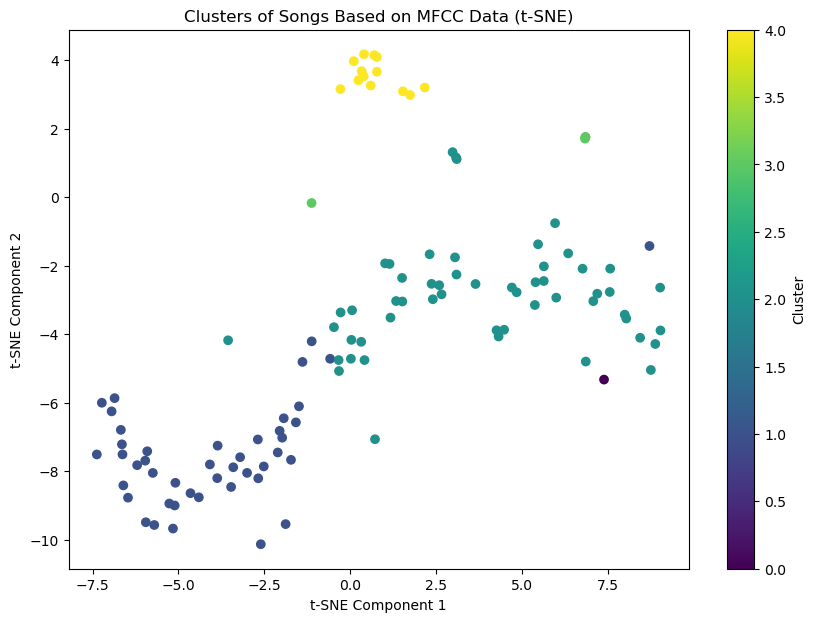

In [23]:
import matplotlib.pyplot as plt

# Plot the clusters in 2D using t-SNE reduced features
plt.figure(figsize=(10, 7))
plt.scatter(reduced_2d[:, 0], reduced_2d[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Songs Based on MFCC Data (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()